In [1]:
import os
import pandas as pd
import face_recognition
import matplotlib.pyplot as plt
import cv2
import numpy as np

ruta_carpeta_inicial = '/home/waldos/Documents/2doCodigo/TopicoIA/BD/corpus_images'

Primero inspeccionamos la carpeta y todas las fotos le extraemos las caracteristicas del rostro. Las asignamos en 4 categorias

In [2]:
#Crear lista para almacenar datos de imagenes
directorio = []

for nombre_carpeta in os.listdir(ruta_carpeta_inicial):
    ruta_carpeta = os.path.join(ruta_carpeta_inicial, nombre_carpeta)
    if os.path.isdir(ruta_carpeta):
        for nombre_archivo in os.listdir(ruta_carpeta):
            try:
                ruta_archivo = os.path.join(ruta_carpeta, nombre_archivo)
                imagen_BGR = cv2.imread(ruta_archivo)

                imagen_Gray = cv2.cvtColor(imagen_BGR, cv2.COLOR_BGR2GRAY)

                imagen_redimensionada = cv2.resize(imagen_Gray,(150,150))

                caracteristicas_faciales = face_recognition.face_landmarks(imagen_redimensionada)
                
                arriba,derecha,abajo,izquierda = face_recognition.face_locations(imagen_redimensionada)[0]

                cara_recortada = imagen_redimensionada[arriba:abajo, izquierda:derecha]
                directorio.append([imagen_redimensionada, caracteristicas_faciales[0], cara_recortada, nombre_carpeta])
                #for rostro, landmark in zip(cara_recortada,caracteristicas_faciales):
                  #  directorio.append([imagen_redimensionada, landmark, cara_recortada, nombre_carpeta])
                

            except Exception as e:
                print("Error en archivo:"+str(nombre_archivo)+":"+str(e))


Error en archivo:identificador_5772_2016-12-05_14-31-53.jpeg:list index out of range
Error en archivo:identificador_1528_2016-11-28_14-53-18.jpeg:list index out of range
Error en archivo:identificador_994_2016-11-09_14-05-26.jpeg:list index out of range
Error en archivo:identificador_5867_2016-12-05_15-02-28.jpeg:list index out of range
Error en archivo:identificador_3455_2016-11-30_13-41-59.jpeg:list index out of range
Error en archivo:identificador_993_2016-11-09_14-05-22.jpeg:list index out of range
Error en archivo:identificador_1527_2016-11-28_14-53-14.jpeg:list index out of range
Error en archivo:identificador_273_2016-11-08_13-30-53.jpeg:list index out of range
Error en archivo:identificador_1558_2016-11-28_14-55-22.jpeg:list index out of range
Error en archivo:250.jpeg:list index out of range
Error en archivo:243.jpeg:list index out of range
Error en archivo:227.jpeg:list index out of range
Error en archivo:255.jpeg:list index out of range
Error en archivo:239.jpeg:list index o

Creamos el Dataset en formato Pandas

In [3]:
columnas = ['Imagen', 'Caracteristicas', 'Rostro', 'Etiqueta']
df = pd.DataFrame(directorio, columns=columnas)
df.head()

,Imagen,Caracteristicas,Rostro,Etiqueta
0,"[[181, 181, 181, 181, 182, 182, 181, 182, 182,...","{'chin': [(60, 68), (60, 74), (61, 80), (62, 8...","[[27, 25, 33, 28, 19, 23, 33, 22, 23, 42, 79, ...",focused
1,"[[165, 165, 166, 165, 167, 166, 166, 166, 166,...","{'chin': [(55, 59), (55, 65), (56, 72), (57, 7...","[[165, 16, 8, 46, 13, 11, 8, 13, 32, 73, 93, 1...",focused
2,"[[162, 163, 162, 162, 163, 162, 162, 162, 162,...","{'chin': [(56, 74), (56, 81), (58, 89), (59, 9...","[[17, 18, 15, 23, 38, 67, 87, 96, 95, 102, 102...",focused
3,"[[167, 167, 167, 167, 169, 167, 167, 168, 168,...","{'chin': [(59, 83), (59, 90), (59, 97), (60, 1...","[[173, 149, 16, 13, 13, 12, 31, 68, 91, 96, 10...",focused
4,"[[171, 169, 170, 168, 171, 172, 170, 170, 171,...","{'chin': [(50, 67), (50, 74), (51, 81), (52, 8...","[[171, 171, 170, 168, 52, 16, 8, 5, 8, 27, 72,...",focused


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5023 entries, 0 to 5022
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Imagen           5023 non-null   object
 1   Caracteristicas  5023 non-null   object
 2   Rostro           5023 non-null   object
 3   Etiqueta         5023 non-null   object
dtypes: object(4)
memory usage: 157.1+ KB


In [5]:
etiquetas_distintas = df['Etiqueta'].unique()

# Mostrar las etiquetas distintas
print("Etiquetas distintas en la columna 'Etiqueta':")
for etiqueta in etiquetas_distintas:
    print(etiqueta)

Etiquetas distintas en la columna 'Etiqueta':
focused
relaxed
excited
engaged
interested
bored


In [6]:

# Elimina las filas que contienen las etiquetas 'focused' y 'bored'
df = df[~df['Etiqueta'].isin(['focused', 'interested','relaxed'])]

etiquetas_distintas = df['Etiqueta'].unique()

# Mostrar las etiquetas distintas
print("Etiquetas distintas en la columna 'Etiqueta':")
for etiqueta in etiquetas_distintas:
    print(etiqueta)


Etiquetas distintas en la columna 'Etiqueta':
excited
engaged
bored


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4623 entries, 250 to 5022
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Imagen           4623 non-null   object
 1   Caracteristicas  4623 non-null   object
 2   Rostro           4623 non-null   object
 3   Etiqueta         4623 non-null   object
dtypes: object(4)
memory usage: 180.6+ KB


Tranformamos de directorios a Numpy la columna de caracteristicas

In [8]:
def extract_facial_landmarks(face_landmarks):
    """
    Toma un diccionario almacenado en la columna 'Landmarks' y elimina las keys,
    dejando solo las coordenadas de donde se encuentran los puntos faciales.
    """
    landmarks = []
    for facial_feature in face_landmarks.keys():
        landmarks.extend(face_landmarks[facial_feature])
    return np.array(landmarks)
df['Caracteristicas'] = df['Caracteristicas'].apply(extract_facial_landmarks)

In [9]:
# Reiniciar los índices
df = df.reset_index(drop=True)

In [10]:
df.head()

,Imagen,Caracteristicas,Rostro,Etiqueta
0,"[[154, 157, 156, 157, 158, 159, 157, 157, 159,...","[[59, 64], [59, 72], [61, 80], [62, 88], [64, ...","[[167, 166, 166, 18, 14, 35, 102, 18, 24, 39, ...",excited
1,"[[156, 155, 156, 156, 159, 156, 156, 157, 158,...","[[57, 63], [58, 71], [59, 79], [60, 87], [62, ...","[[167, 151, 9, 12, 107, 112, 19, 30, 40, 42, 8...",excited
2,"[[172, 171, 173, 171, 172, 172, 173, 172, 172,...","[[60, 81], [60, 90], [61, 98], [62, 106], [64,...","[[51, 5, 8, 81, 100, 105, 104, 107, 111, 123, ...",excited
3,"[[171, 168, 168, 170, 171, 169, 169, 170, 170,...","[[62, 86], [62, 92], [64, 97], [65, 102], [67,...","[[16, 15, 12, 17, 23, 36, 84, 121, 132, 141, 1...",excited
4,"[[180, 181, 181, 181, 183, 182, 181, 182, 182,...","[[58, 75], [59, 82], [60, 89], [62, 96], [64, ...","[[4, 5, 9, 25, 85, 107, 119, 126, 130, 134, 13...",excited


Vemos el tamaño (shape) en los cuales está el Dataset

In [11]:
print(df['Imagen'][0].shape)
print(df['Caracteristicas'][0].shape)
print(df['Rostro'][0].shape)

(150, 150)
(72, 2)
(62, 62)


Guardar el dataset

In [12]:
df.to_hdf('BD_Emotions_3.h5', key='dataframe', mode = 'w')

/tmp/ipykernel_123184/2250583295.py:1: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->Index(['Imagen', 'Caracteristicas', 'Rostro', 'Etiqueta'], dtype='object')]

  df.to_hdf('BD_Emotions_3.h5', key='dataframe', mode = 'w')


Leer archivo creado

In [13]:
import pandas as pd
df_HDF = pd.read_hdf('BD_Emotions_3.h5')

In [14]:
print(df_HDF.shape[1])

4


In [15]:
df_HDF.head()

,Imagen,Caracteristicas,Rostro,Etiqueta
0,"[[154, 157, 156, 157, 158, 159, 157, 157, 159,...","[[59, 64], [59, 72], [61, 80], [62, 88], [64, ...","[[167, 166, 166, 18, 14, 35, 102, 18, 24, 39, ...",excited
1,"[[156, 155, 156, 156, 159, 156, 156, 157, 158,...","[[57, 63], [58, 71], [59, 79], [60, 87], [62, ...","[[167, 151, 9, 12, 107, 112, 19, 30, 40, 42, 8...",excited
2,"[[172, 171, 173, 171, 172, 172, 173, 172, 172,...","[[60, 81], [60, 90], [61, 98], [62, 106], [64,...","[[51, 5, 8, 81, 100, 105, 104, 107, 111, 123, ...",excited
3,"[[171, 168, 168, 170, 171, 169, 169, 170, 170,...","[[62, 86], [62, 92], [64, 97], [65, 102], [67,...","[[16, 15, 12, 17, 23, 36, 84, 121, 132, 141, 1...",excited
4,"[[180, 181, 181, 181, 183, 182, 181, 182, 182,...","[[58, 75], [59, 82], [60, 89], [62, 96], [64, ...","[[4, 5, 9, 25, 85, 107, 119, 126, 130, 134, 13...",excited


Impresión de los datos para verlos gŕaficamente

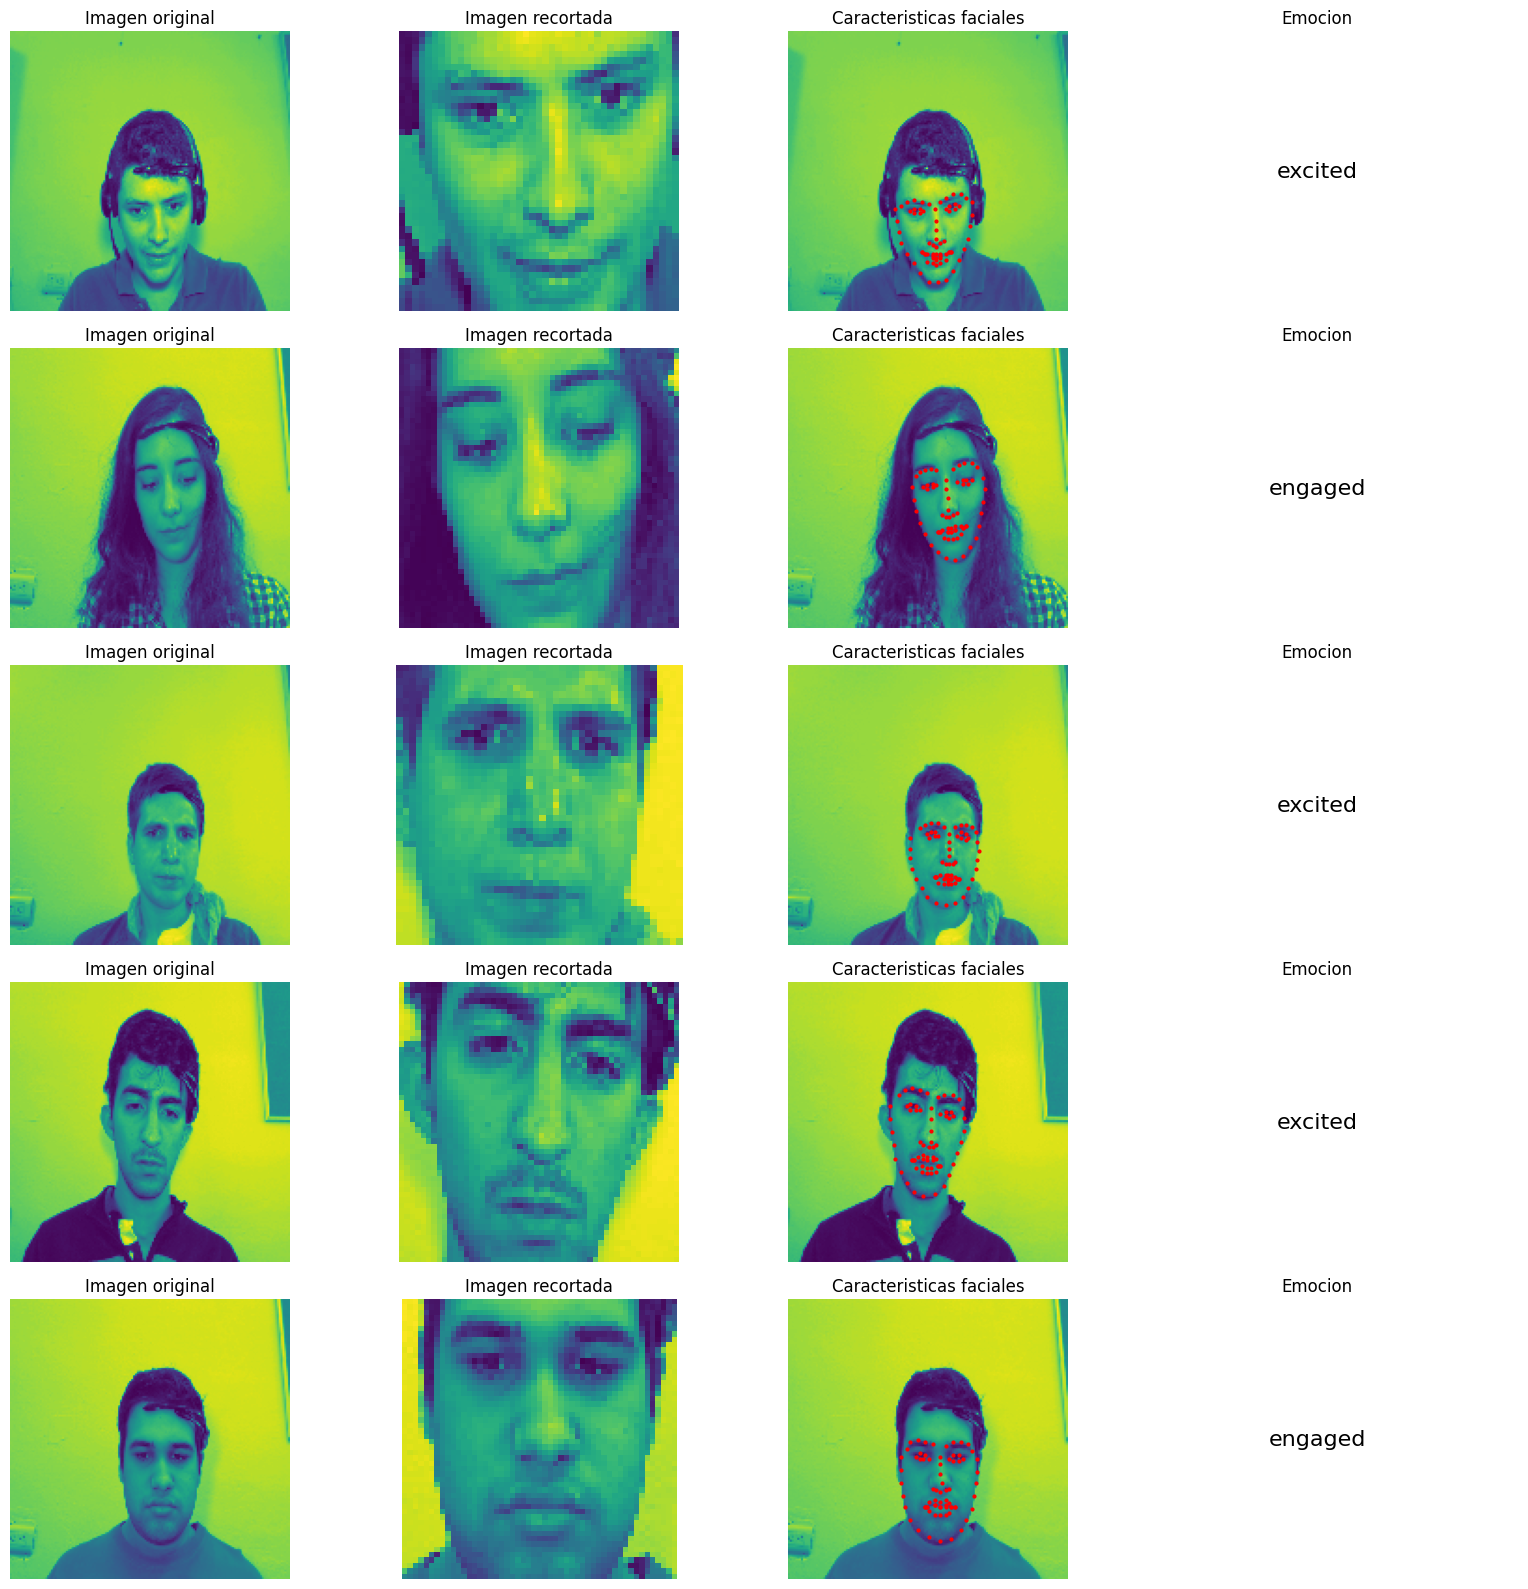

In [16]:
import matplotlib.pyplot as plt

df_ejemploHDF = df_HDF.sample(n=5)
columnas_dfHDF = df_HDF.shape[1]

fig, axes = plt.subplots(nrows = len(df_ejemploHDF), ncols=columnas_dfHDF, figsize=(16,16))

for i, (index, row) in enumerate(df_ejemploHDF.iterrows()):
    ax0 = axes[i,0]
    ax0.imshow(row['Imagen'])
    ax0.set_title('Imagen original')
    ax0.axis('off')

    ax1 = axes[i,1]
    ax1.imshow(row['Rostro'])
    ax1.set_title('Imagen recortada')
    ax1.axis('off')

    ax2 = axes[i,2]
    ax2.imshow(row['Imagen'])

    for caracteristicas in row['Caracteristicas']:
        ax2.plot(caracteristicas[0], caracteristicas[1], marker= 'o', markersize = 2, color='red')

    ax2.set_title('Caracteristicas faciales')
    ax2.axis('off')

    ax3 = axes[i,3]

    ax3.text(0.5, 0.5, row['Etiqueta'], horizontalalignment= 'center',verticalalignment='center',fontsize=16)
    ax3.set_title('Emocion')
    ax3.axis('off')
plt.tight_layout()
plt.show()
    
    
    